# Regression

#### What is Regression?
Regression is a statistical measurement that is used to try to determine the relationship between a dependent variable (often denoted by Y), and series of varying variables (called independent variables, often denoted by X ).

#### What is Polynomial Regression
This is a form of Regression Analysis where the relationship between Y and X is denoted as the nth degree/power of X. Polynomial regression even fits a non-linear relationship (e.g when the points don't form a straight line).

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

C:\Users\Shivam Tyagi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shivam Tyagi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shivam Tyagi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shivam Tyagi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.

Instructions for updating:
non-resource variables are not supported in the long term


C:\Users\Shivam Tyagi\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shivam Tyagi\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shivam Tyagi\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shivam Tyagi\anaconda3\lib\site-packages\tensorboard\co

## Importing the dataset and inspecting it

In [2]:
dataset = pd.read_csv("D:/Code/ML_AI_Course/Machine Learning A-Z New/Part 2 - Regression/Section 6 - Polynomial Regression/Position_Salaries.csv")
X = dataset["Level"].to_list()
y = dataset["Salary"].to_list()
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


### Plotting the dataset

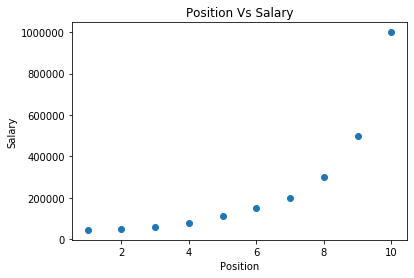

In [3]:
n = len(X)
plt.scatter(X, y)
plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Position Vs Salary")
plt.show()

## Now lets start training our model

### First we define our variables

In [4]:
px = tf.placeholder("float")
py = tf.placeholder("float")

# Defining Variables
a = tf.Variable(np.random.randn(), name = "a")
b = tf.Variable(np.random.randn(), name = "b")
c = tf.Variable(np.random.randn(), name = "c")
d = tf.Variable(np.random.randn(), name = "d")
e = tf.Variable(np.random.randn(), name = "e")
f = tf.Variable(np.random.randn(), name = "f")

learning_rate = 0.2
training_epochs = 20000

### Now we write the various equations we will use for our project

In [5]:
deg1 = a*px + b
deg2 = a*tf.pow(px,2) + b*px + c
deg3 = a*tf.pow(px,3) + b*tf.pow(px,2) + c*px + d
deg4 = a*tf.pow(px,4) + b*tf.pow(px,3) + c*tf.pow(px,2) + d*px + e
deg5 = a*tf.pow(px,5) + b*tf.pow(px,4) + c*tf.pow(px,3) + d*tf.pow(px,2) + e*px + f

### Now lets write our cost equations

In [6]:
mse1 = tf.reduce_sum(tf.pow(deg1-py,2))/(2*n)
mse2 = tf.reduce_sum(tf.pow(deg2-py,2))/(2*n)
mse3 = tf.reduce_sum(tf.pow(deg3-py,2))/(2*n)
mse4 = tf.reduce_sum(tf.pow(deg4-py,2))/(2*n)
mse5 = tf.reduce_sum(tf.pow(deg5-py,2))/(2*n)

### And lastly create our optimizer functions

In [7]:
optimizer1 = tf.train.GradientDescentOptimizer(learning_rate).minimize(mse1)
optimizer2 = tf.train.AdamOptimizer(learning_rate).minimize(mse2)
optimizer3 = tf.train.AdamOptimizer(learning_rate).minimize(mse3)
optimizer4 = tf.train.AdamOptimizer(learning_rate).minimize(mse4)
optimizer5 = tf.train.AdamOptimizer(learning_rate).minimize(mse5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## First we look at our model, when linearly trained

In [8]:
# Initializing and starting session
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (_x, _y) in zip(X, y):
            sess.run(optimizer1, feed_dict = {px:_x, py:_y})
        if (epoch+1) % 1000 == 0:
            cost = sess.run(mse1, feed_dict = {px:X, py:y})
            print("Epoch",(epoch+1), ": Training Cost:", cost," a,b:",
                  sess.run(a), sess.run(b))

        training_cost = sess.run(mse1,feed_dict={px:X,py:y})
        coefficient1 = sess.run(a)
        constant = sess.run(b)

print(training_cost, coefficient1, constant)

Epoch 1000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 2000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 3000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 4000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 5000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 6000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 7000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 8000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 9000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 10000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 11000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 12000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 13000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 14000 : Training Cost: 88999160000.0  a,b: 180396.44 -478869.1
Epoch 15000 : Training Cost: 88999160000.0 

## Lets plot this and see the result

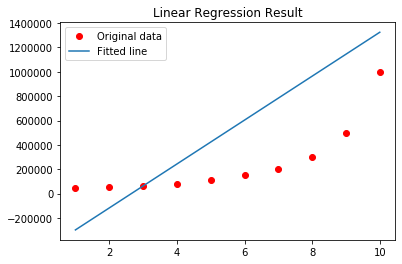

In [9]:
predictions = []
for i in X:
  predictions.append((coefficient1*i + constant))
plt.plot(X , y, 'ro', label ='Original data')
plt.plot(X, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

The dataset was clearly not linear, yet our model tried its best to create a straight line
such that it would most fit our dataset.

But now, we move up to Quadratic Equation and higher to see how well it performs on this dataset.

# Quadratic Equation

Epoch 1000 : Training Cost: 52583105000.0  a,b,c: 1001.43335 1099.052 1277.0342
Epoch 2000 : Training Cost: 37808060000.0  a,b,c: 1951.4474 2132.3525 2470.1538
Epoch 3000 : Training Cost: 26758003000.0  a,b,c: 2838.6467 3083.7375 3554.7861
Epoch 4000 : Training Cost: 19024870000.0  a,b,c: 3643.6812 3925.1594 4486.8413
Epoch 5000 : Training Cost: 14063549000.0  a,b,c: 4344.2354 4623.7236 5213.3467
Epoch 6000 : Training Cost: 11202960000.0  a,b,c: 4920.469 5150.5586 5689.8804
Epoch 7000 : Training Cost: 9733856000.0  a,b,c: 5364.14 5495.544 5907.705
Epoch 8000 : Training Cost: 9051619000.0  a,b,c: 5684.8667 5675.8037 5903.1313
Epoch 9000 : Training Cost: 8750910000.0  a,b,c: 5906.5063 5727.587 5735.876
Epoch 10000 : Training Cost: 8613565000.0  a,b,c: 6056.9385 5690.0767 5462.322
Epoch 11000 : Training Cost: 8540440000.0  a,b,c: 6160.1445 5595.067 5124.019
Epoch 12000 : Training Cost: 8491372500.0  a,b,c: 6233.534 5464.803 4748.256
Epoch 13000 : Training Cost: 8451198500.0  a,b,c: 6288.6

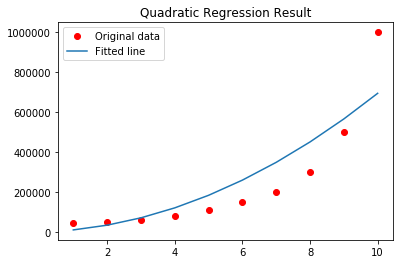

In [10]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
      for (_x,_y) in zip(X, y):
        sess.run(optimizer2, feed_dict={px:_x, py:_y})
      if (epoch+1) % 1000 == 0:
        cost = sess.run(mse2,feed_dict={px:X, py:y})
        print("Epoch",(epoch+1), ": Training Cost:", cost,
              " a,b,c:",sess.run(a),sess.run(b),sess.run(c))

        training_cost = sess.run(mse2,feed_dict={px:X, py:y})
        coefficient1 = sess.run(a)
        coefficient2 = sess.run(b)
        constant = sess.run(c)

print(training_cost, coefficient1, coefficient2, constant)

# Plotting the results
predictions = []
for i in X:
  predictions.append((coefficient1*pow(i,2) + coefficient2*i + constant))
plt.plot(X , y, 'ro', label ='Original data')
plt.plot(X, predictions, label ='Fitted line')
plt.title('Quadratic Regression Result')
plt.legend()
plt.show()

As expected the cost function keeps decreasing as the values try to fit onto our model.

# Cubic Equation

Epoch 1000 : Training Cost: 4284908300.0  a,b,c,d: 669.5689 696.9524 752.36945 905.9054
Epoch 2000 : Training Cost: 3772160000.0  a,b,c,d: 742.30994 669.14276 638.07166 861.2135
Epoch 3000 : Training Cost: 3718854000.0  a,b,c,d: 755.93555 572.08844 449.0899 749.9063
Epoch 4000 : Training Cost: 3668554500.0  a,b,c,d: 769.129 476.7509 266.43677 656.0923
Epoch 5000 : Training Cost: 3621077000.0  a,b,c,d: 782.0107 383.22635 90.13688 579.5258
Epoch 6000 : Training Cost: 3576253200.0  a,b,c,d: 794.58203 291.48154 -79.90416 519.83154
Epoch 7000 : Training Cost: 3533908000.0  a,b,c,d: 806.8618 201.48514 -243.81102 476.5936
Epoch 8000 : Training Cost: 3493900300.0  a,b,c,d: 818.83936 113.22328 -401.68317 449.41635
Epoch 9000 : Training Cost: 3456077000.0  a,b,c,d: 830.5139 26.643007 -553.6573 437.85797
Epoch 10000 : Training Cost: 3420284200.0  a,b,c,d: 841.9334 -58.28144 -699.85223 441.49283
Epoch 11000 : Training Cost: 3386398200.0  a,b,c,d: 853.0586 -141.60371 -840.4149 459.8674
Epoch 12000 

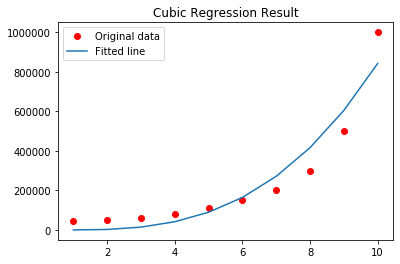

In [11]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
      for (_x,_y) in zip(X, y):
        sess.run(optimizer3, feed_dict={px:_x, py:_y})
      if (epoch+1) % 1000 == 0:
        cost = sess.run(mse3,feed_dict={px:X, py:y})
        print("Epoch",(epoch+1), ": Training Cost:", cost,
              " a,b,c,d:",sess.run(a),sess.run(b),sess.run(c),sess.run(d))

        training_cost = sess.run(mse3,feed_dict={px:X, py:y})
        coefficient1 = sess.run(a)
        coefficient2 = sess.run(b)
        coefficient3 = sess.run(c)
        constant = sess.run(d)

print(training_cost, coefficient1, coefficient2, coefficient3, constant)

# Plotting the results
predictions = []
for i in X:
  predictions.append((coefficient1*pow(i,3) + coefficient2*pow(i,2) + 
                      coefficient3*i + constant))
plt.plot(X , y, 'ro', label ='Original data')
plt.plot(X, predictions, label ='Fitted line')
plt.title('Cubic Regression Result')
plt.legend()
plt.show()

# Quartic Equation

Epoch 1000 : Training Cost: 1905176800.0  a,b,c,d: 84.19044 54.851273 55.366104 143.2125 509.769
Epoch 2000 : Training Cost: 1856336800.0  a,b,c,d: 88.746124 15.455679 14.076055 222.58315 1051.5432
Epoch 3000 : Training Cost: 1814501000.0  a,b,c,d: 92.72613 -20.163652 -16.100618 325.09555 1627.9116
Epoch 4000 : Training Cost: 1777194200.0  a,b,c,d: 96.23184 -52.65283 -37.182877 446.10632 2230.546
Epoch 5000 : Training Cost: 1742840200.0  a,b,c,d: 99.35277 -82.5882 -50.94512 581.62115 2852.6936
Epoch 6000 : Training Cost: 1710463500.0  a,b,c,d: 102.164986 -110.45998 -58.895805 728.30286 3488.9175
Epoch 7000 : Training Cost: 1679467300.0  a,b,c,d: 104.73147 -136.6758 -62.28405 883.418 4134.9683
Epoch 8000 : Training Cost: 1649506200.0  a,b,c,d: 107.104195 -161.57117 -62.124294 1044.7722 4787.2515
Epoch 9000 : Training Cost: 1620376600.0  a,b,c,d: 109.32446 -185.41713 -59.22458 1210.6239 5442.9214
Epoch 10000 : Training Cost: 1591935900.0  a,b,c,d: 111.4257 -208.43161 -54.220837 1379.629 

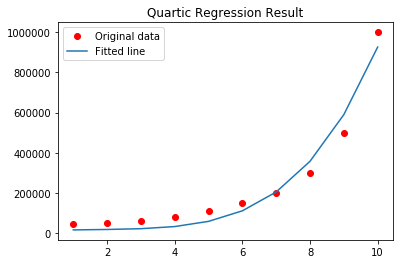

In [12]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
      for (_x,_y) in zip(X, y):
        sess.run(optimizer4, feed_dict={px:_x, py:_y})
      if (epoch+1) % 1000 == 0:
        cost = sess.run(mse4,feed_dict={px:X, py:y})
        print("Epoch",(epoch+1), ": Training Cost:", cost,
              " a,b,c,d:",sess.run(a),sess.run(b),
              sess.run(c),sess.run(d),sess.run(e))

        training_cost = sess.run(mse4,feed_dict={px:X, py:y})
        coefficient1 = sess.run(a)
        coefficient2 = sess.run(b)
        coefficient3 = sess.run(c)
        coefficient4 = sess.run(d)
        constant = sess.run(e)

print(training_cost, coefficient1, coefficient2,
      coefficient3, coefficient4, constant)

# Plotting the results
predictions = []
for i in X:
  predictions.append((coefficient1*pow(i,4) + coefficient2*pow(i,3)+
                      coefficient3*pow(i,2) + coefficient4*i + constant))
plt.plot(X, y, 'ro', label ='Original data')
plt.plot(X, predictions, label ='Fitted line')
plt.title('Quartic Regression Result')
plt.legend()
plt.show()

# Quintic Equation

Epoch 1000 : Training Cost: 1414952400.0  a,b,c,d,e,f: 7.8360844 8.968988 52.53185 177.1937 468.99396 1005.04865
Epoch 2000 : Training Cost: 1312640300.0  a,b,c,d,e,f: 8.63682 -2.629379 69.82851 308.21442 888.24365 1985.2036
Epoch 3000 : Training Cost: 1218106200.0  a,b,c,d,e,f: 9.63952 -15.543693 82.82758 429.3778 1289.2927 2946.4607
Epoch 4000 : Training Cost: 1128869200.0  a,b,c,d,e,f: 10.656633 -28.479052 95.14795 547.7208 1682.9066 3898.3203
Epoch 5000 : Training Cost: 1044656060.0  a,b,c,d,e,f: 11.663057 -41.25882 107.25411 664.1143 2070.2427 4841.464
Epoch 6000 : Training Cost: 965361660.0  a,b,c,d,e,f: 12.654948 -53.85322 119.21064 778.566 2451.1113 5775.2295
Epoch 7000 : Training Cost: 890875900.0  a,b,c,d,e,f: 13.631286 -66.25108 131.01236 891.0372 2825.2168 6698.8086
Epoch 8000 : Training Cost: 821093800.0  a,b,c,d,e,f: 14.5910015 -78.44134 142.66458 1001.44147 3192.2065 7611.2964
Epoch 9000 : Training Cost: 755902600.0  a,b,c,d,e,f: 15.533741 -90.417244 154.15535 1109.6519 

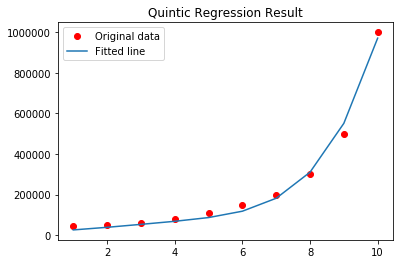

In [13]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
      for (_x,_y) in zip(X, y):
        sess.run(optimizer5, feed_dict={px:_x, py:_y})
      if (epoch+1) % 1000 == 0:
        cost = sess.run(mse5,feed_dict={px:X, py:y})
        print("Epoch",(epoch+1), ": Training Cost:", cost,
              " a,b,c,d,e,f:",sess.run(a),sess.run(b),sess.run(c),
              sess.run(d),sess.run(e),sess.run(f))

        training_cost = sess.run(mse5,feed_dict={px:X, py:y})
        coefficient1 = sess.run(a)
        coefficient2 = sess.run(b)
        coefficient3 = sess.run(c)
        coefficient4 = sess.run(d)
        coefficient5 = sess.run(e)
        constant = sess.run(f)
        
print(training_cost, coefficient1, coefficient2,
      coefficient3, coefficient4,coefficient5, constant)

# Plotting the results
predictions = []
for i in X:
  predictions.append((coefficient1*pow(i,5) + coefficient2*pow(i,4)+
                      coefficient3*pow(i,3) + coefficient4*pow(i,2)+
                      coefficient5*i + constant))
plt.plot(X, y, 'ro', label ='Original data')
plt.plot(X, predictions, label ='Fitted line')
plt.title('Quintic Regression Result')
plt.legend()
plt.show()